<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Первичный-анализ-данных" data-toc-modified-id="Первичный-анализ-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Первичный анализ данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-переменных" data-toc-modified-id="Анализ-переменных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Анализ переменных</a></span><ul class="toc-item"><li><span><a href="#Name" data-toc-modified-id="Name-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Name</a></span></li><li><span><a href="#Sex" data-toc-modified-id="Sex-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Sex</a></span></li><li><span><a href="#SibSp,-Parch" data-toc-modified-id="SibSp,-Parch-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>SibSp, Parch</a></span></li><li><span><a href="#Embarked" data-toc-modified-id="Embarked-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Embarked</a></span></li><li><span><a href="#Pclass" data-toc-modified-id="Pclass-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Pclass</a></span></li><li><span><a href="#Fare" data-toc-modified-id="Fare-2.1.6"><span class="toc-item-num">2.1.6&nbsp;&nbsp;</span>Fare</a></span></li><li><span><a href="#Age" data-toc-modified-id="Age-2.1.7"><span class="toc-item-num">2.1.7&nbsp;&nbsp;</span>Age</a></span></li><li><span><a href="#Survived" data-toc-modified-id="Survived-2.1.8"><span class="toc-item-num">2.1.8&nbsp;&nbsp;</span>Survived</a></span></li></ul></li></ul></li><li><span><a href="#Моделирование" data-toc-modified-id="Моделирование-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Моделирование</a></span><ul class="toc-item"><li><span><a href="#Подготовка-датасета" data-toc-modified-id="Подготовка-датасета-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Подготовка датасета</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#KNN" data-toc-modified-id="KNN-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>KNN</a></span></li><li><span><a href="#Оптимизация-вероятностной-границы" data-toc-modified-id="Оптимизация-вероятностной-границы-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Оптимизация вероятностной границы</a></span></li><li><span><a href="#CatBoost-Classifier" data-toc-modified-id="CatBoost-Classifier-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>CatBoost Classifier</a></span></li></ul></li><li><span><a href="#Тест-модели" data-toc-modified-id="Тест-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тест модели</a></span></li></ul></div>

## Первичный анализ данных

In [137]:
# импортируем все необходимые библиотеки
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from scipy import stats as st

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import f1_score, precision_recall_curve, accuracy_score
from catboost import CatBoostClassifier, Pool, cv

import seaborn as sns
import missingno as msn

In [138]:
#загрузим данные
df_train = pd.read_csv('datasets/train.csv')
df_test = pd.read_csv('datasets/test.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


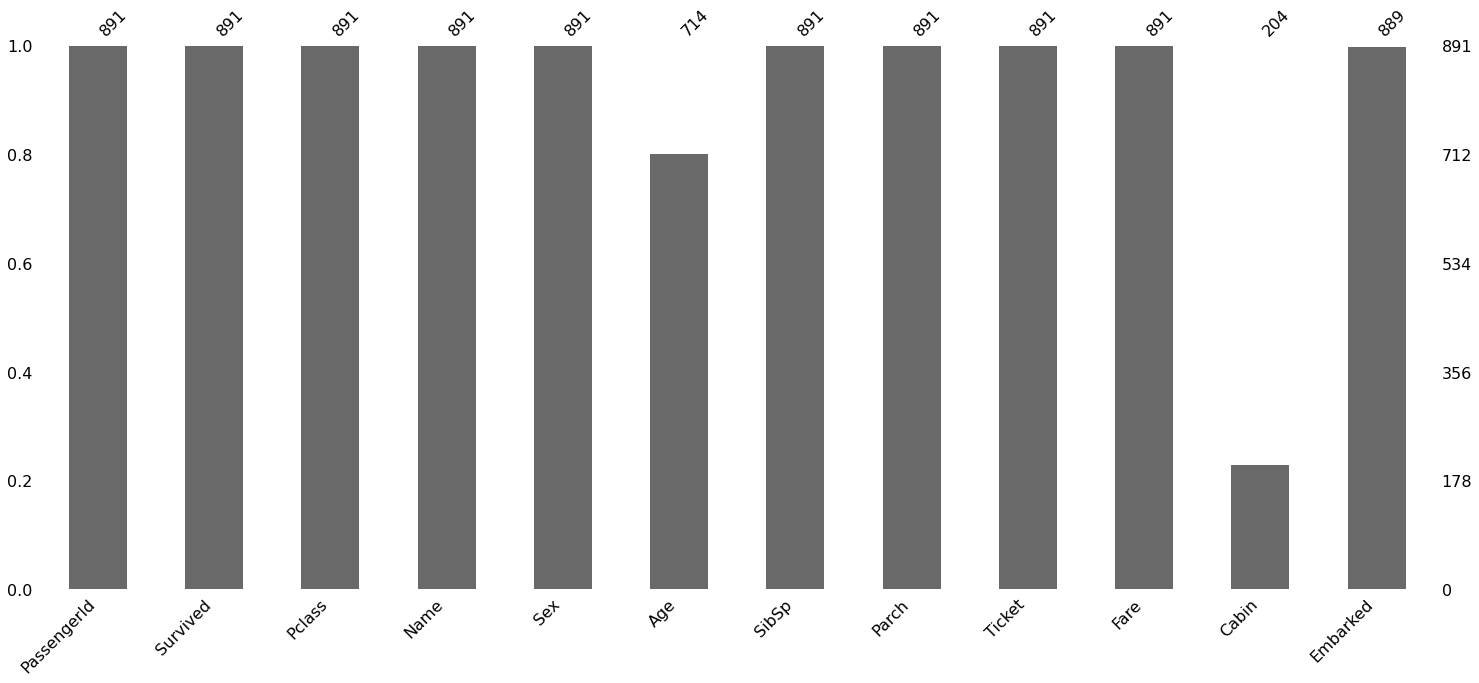

In [139]:
msn.bar(df_train);

In [140]:
df_train.isnull().sum() / df_train.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [141]:
df_train.duplicated().sum()

0

In [142]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Вывод**   
1. Датасет содержит 11 признаков (2 количественных: Age, Fare + 9 категориальных) и целевую переменную Survived.
2. Все переменные имеют ожидаемый тип данных.
3. Пропуски содержатся в переменных Age, Cabin, Embarked. 
  - Переменную Cabin можно убрать из датасета, так как она содержит почти 80% пропусков.
  - В переменной Age также можно либо избавиться от пропусков, либо заменить переменную на возрастные категории. 
  - Embarked содержит всего 2 пропуска - ими можно пренебречь.
4. Дубликатов нет.

## Исследовательский анализ данных

Прежде чем переходить к различным сценариям, выполним ряд общих действий:
1. Избавимся от пропусков, где они не критичны (Embarked).
2. Удалим переменные, не несущие критического смысла: PassengerId, Ticket, Cabin
3. Проанализируем каждую из переменных

In [143]:
#удалим пропуски, где их доля не критична
df_train.dropna(subset=['Embarked'], inplace=True)

In [144]:
# оставим базовый набор признаков
df_train.index = df_train['PassengerId']
df_train = df_train.drop(['PassengerId', 'Cabin', 'Ticket'], axis=1)

df_test.index = df_test['PassengerId']
df_test = df_test.drop(['PassengerId', 'Cabin', 'Ticket'], axis=1)

### Анализ переменных

#### Name

Переменная Name содержит фамилию, имя, а также социальный статус пассажира. Последнее может быть интересно с точки зрения анализа выживаемости в зависимости от статуса.

In [145]:
df_train['Name'] = df_train['Name'].transform(lambda el: el.split()[1])
df_test['Name'] = df_test['Name'].transform(lambda el: el.split()[1])
df_train.rename(columns={'Name': 'Status'}, inplace=True)
df_test.rename(columns={'Name': 'Status'}, inplace=True)

In [146]:
df_train['Status'].value_counts()

Mr.             502
Miss.           178
Mrs.            120
Master.          40
Dr.               7
Rev.              6
y                 4
Planke,           3
Impe,             3
Gordon,           2
Col.              2
Mlle.             2
Major.            2
Melkebeke,        1
Jonkheer.         1
Shawah,           1
the               1
Velde,            1
Capt.             1
Messemaeker,      1
Carlo,            1
Ms.               1
Mme.              1
Steen,            1
Mulder,           1
Pelsmaeker,       1
Walle,            1
der               1
Billiard,         1
Don.              1
Cruyssen,         1
Name: Status, dtype: int64

In [147]:
#определим список популярных
common = list(df_train['Status'].value_counts().head(4).index)
common

['Mr.', 'Miss.', 'Mrs.', 'Master.']

In [148]:
#заменим непопулярные статусы на 'other'
df_train['Status'] = df_train['Status'].transform(lambda el: 'Other' if el not in common else el)
df_test['Status'] = df_test['Status'].transform(lambda el: 'Other' if el not in common else el)

In [149]:
df_train[['Status', 'Survived']].groupby(['Status'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Status,Survived
3,Mrs.,0.800000
1,Miss.,0.702247
0,Master.,0.575000
4,Other,0.346939
2,Mr.,0.157371


**Вывод**   
Выживаемость среди женщин оказалась существенно выше.

#### Sex

Переменная представлена двумя типами значений: male, female.

In [150]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.740385
1,male,0.188908


Как и несколькими строками выше, мы убедились, что женщин выжило гораздо больше. Заменим строковые значения на бинарные.

In [151]:
df_train['Sex'] = df_train['Sex'].transform(lambda el: 1 if el == 'female' else 0)
df_test['Sex'] = df_test['Sex'].transform(lambda el: 1 if el == 'female' else 0)

#### SibSp, Parch

Данные переменные отвечают за наличие родственников на борту. Проанализируем распределение выживаемости в зависимости от семейного статуса.

In [152]:
df_train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.343234
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [153]:
df_train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by=['Survived'], ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.341716
5,5,0.200000
4,4,0.000000
6,6,0.000000


Наибольшая выживаемость наблюдается в группах, кто был с родственниками на борту. Объединим эти 2 показателя в один: был человек с семьей или нет.

In [154]:
df_train['is_alone'] = ((df_train['Parch'] + df_train['SibSp']) == 0).replace(True, 1).replace(False, 0)
df_train = df_train.drop(['SibSp', 'Parch'], axis=1)

df_test['is_alone'] = ((df_test['Parch'] + df_test['SibSp']) == 0).replace(True, 1).replace(False, 0)
df_test = df_test.drop(['SibSp', 'Parch'], axis=1)

#### Embarked

Переменная отвечает за порт, в котором производилась посадка. Аналогично проанализируем влияние на целевую переменную.

In [155]:
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Выживаемость в портах неравномерна => оставим все 3 в качестве факторов.

#### Pclass

In [156]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.626168
1,2,0.472826
2,3,0.242363


Чем выше класс обслуживания, тем выше выживаемость.

#### Fare

Цена за билет должна зависеть от класса обслуживания. Построим график и убедимся.

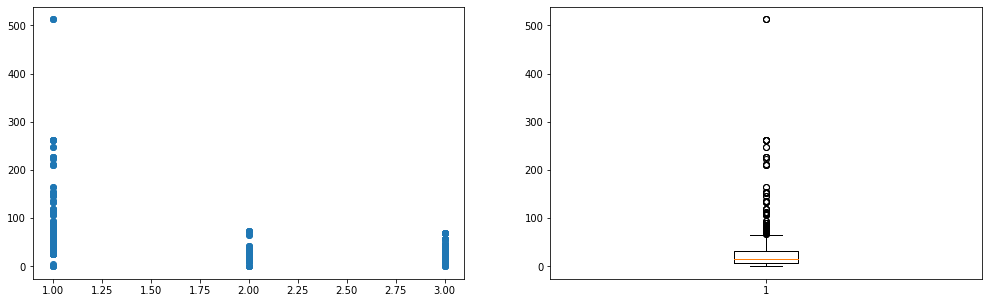

In [157]:
x = df_train['Pclass']
y = df_train['Fare']
fig = plt.figure(figsize=(17, 5))
ax1 = fig.add_subplot(121)
ax1.scatter(x, y)

ax2 = fig.add_subplot(122)
ax2.boxplot(y);

In [158]:
outliers = plt.boxplot(y)['fliers'][0].get_data()[1]
print(f'Доля выбросов: {(len(outliers) / len(y)):.1%}')
plt.close()

Доля выбросов: 12.8%


Далее проанализируем выживаемость в зависимости от цены за билет. Агрегируем данные для удобства анализа.

In [159]:
df_train['FareCat'] = df_train['Fare'] // 20 * 20
df_train[['FareCat', 'Survived']].groupby(['FareCat'], as_index=False).mean()

,FareCat,Survived
0,0.0,0.277670
1,20.0,0.430000
2,40.0,0.574074
3,60.0,0.500000
4,80.0,0.857143
5,100.0,0.636364
6,120.0,0.909091
7,140.0,0.666667
8,160.0,1.000000
9,200.0,0.750000


**Вывод**   
Чем дороже билет, тем выше выживаемость.

#### Age

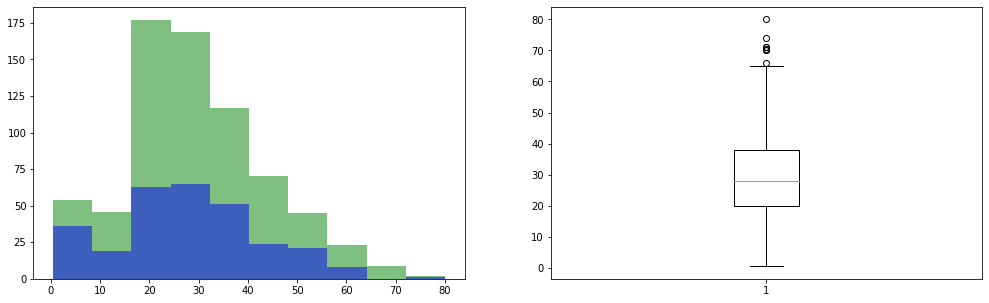

In [160]:
# проанализируем переменную Age
x = df_train['Age'][df_train['Age'] == df_train['Age']]
fig = plt.figure(figsize=(17,5))
ax1 = fig.add_subplot(121)
ax1.hist(x, alpha=0.5, color='green')

y = df_train['Age'][(df_train['Age'] == df_train['Age']) & (df_train['Survived'] == 1)]
ax1.hist(y, alpha=0.5, color='blue')

ax2 = fig.add_subplot(122)
ax2.boxplot(x);

In [161]:
outliers = plt.boxplot(x)['fliers'][0].get_data()[1]
plt.close()
print(f'Доля выбросов = {(len(outliers) / len(x)):.1%}')

Доля выбросов = 1.1%


**Вывод**   
1. Наибольшая часть пассажиров представлена в возрасте от 20 до 40 лет.
2. Выбросы состоят из людей преклонного возраста, их доля - 1.1%.
3. График распределения выживаемости демонстрирует, что была спасена большая доля детей.

Разобьем пассажиров на категории с диапазоном 5 лет и проанализируем распределение выживаемости в группах.

In [162]:
df_train['AgeCat'] = df_train['Age'] // 5 * 5
pvt = df_train.pivot_table(index=['AgeCat'], values=['Survived'], aggfunc=('count', 'sum')).reset_index()
pvt.columns = ['AgeCat', 'Total', 'Survived']
pvt['Share'] = (pvt['Survived'] / pvt['Total']).apply('{:.0%}'.format)
pvt

,AgeCat,Total,Survived,Share
0,0.0,40,27,68%
1,5.0,22,11,50%
2,10.0,16,7,44%
3,15.0,86,34,40%
4,20.0,114,39,34%
5,25.0,106,38,36%
6,30.0,95,40,42%
7,35.0,71,32,45%
8,40.0,48,18,38%
9,45.0,41,16,39%


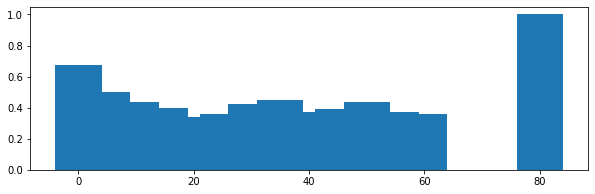

In [163]:
fig = plt.figure(figsize=(10, 3))
x = pvt['AgeCat']
y = (pvt['Survived'] / pvt['Total'])
plt.bar(x, y, width=8);

**Вывод**   
1. Наибольшая выживаемость в группе 0 - 10
2. Достаточно высокая в группе 10 - 20
3. Ниже в группе 20 - 30
2. Далее выживаемость практически равномерна в группах 30 - 55
3. Значительно ниже в группе 55 - 65
4. Практически нулевая в группе 65+
   
Поскольку зависимость не линейная, будет целесообразно выделить подгруппы, описанные выше.

In [164]:
def age_cat(df):
    df['AgeCat'] = ''
    df['AgeCat'][df['Age'] != df['Age']] = 'unknown'
    df['AgeCat'][df['Age'] < 10] = '0'
    df['AgeCat'][(df['Age'] >= 10) & (df['Age'] < 20)] = '1'
    df['AgeCat'][(df['Age'] >= 20) & (df['Age'] < 30)] = '2'
    df['AgeCat'][(df['Age'] >= 30) & (df['Age'] < 55)] = '3'
    df['AgeCat'][(df['Age'] >= 55) & (df['Age'] < 65)] = '4'
    df['AgeCat'][df['Age'] >= 65] = '5'
    return df

df_train = age_cat(df_train)
df_test = age_cat(df_test)

Далее взглянем на пропуски в переменной Age

In [165]:
df_train[['AgeCat', 'Survived']].groupby(['AgeCat']).mean()

,Survived
AgeCat,
0,0.612903
1,0.401961
2,0.350000
3,0.418118
4,0.366667
5,0.090909
unknown,0.293785


Распределение наиболее близко ко второй группе. Осуществим замену.

In [166]:
df_train['AgeCat'][df_train['AgeCat'] == 'unknown'] = '2'
df_test['AgeCat'][df_test['AgeCat'] == 'unknown'] = '2'

#### Survived

In [167]:
df_train['Survived'].value_counts() / df_train.shape[0]

0    0.617548
1    0.382452
Name: Survived, dtype: float64

**Вывод**   
Целевой признак не сбалансирован: выживших на 23пп меньше.

In [168]:
#скорректируем типы данных
df_train = df_train.drop(['Age', 'FareCat'], axis=1)
df_train['Pclass'] = df_train['Pclass'].astype('category')
df_train['Status'] = df_train['Status'].astype('category')
df_train['Embarked'] = df_train['Embarked'].astype('category')
df_train['AgeCat'] = df_train['AgeCat'].astype('category')

In [169]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  889 non-null    int64   
 1   Pclass    889 non-null    category
 2   Status    889 non-null    category
 3   Sex       889 non-null    int64   
 4   Fare      889 non-null    float64 
 5   Embarked  889 non-null    category
 6   is_alone  889 non-null    int64   
 7   AgeCat    889 non-null    category
dtypes: category(4), float64(1), int64(3)
memory usage: 38.9 KB


In [170]:
#скорректируем типы данных
df_test = df_test.drop(['Age'], axis=1)
df_test['Pclass'] = df_test['Pclass'].astype('category')
df_test['Status'] = df_test['Status'].astype('category')
df_test['Embarked'] = df_test['Embarked'].astype('category')
df_test['AgeCat'] = df_test['AgeCat'].astype('category')

In [171]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    category
 1   Status    418 non-null    category
 2   Sex       418 non-null    int64   
 3   Fare      417 non-null    float64 
 4   Embarked  418 non-null    category
 5   is_alone  418 non-null    int64   
 6   AgeCat    418 non-null    category
dtypes: category(4), float64(1), int64(2)
memory usage: 15.4 KB


## Моделирование

В качестве моделей рассмотрим следующие:
- Логистическая регрессия
- Случайный лес
- KNN   

Метрика для сравнения - f1_score.   
   
Но прежде подготовим датасет к моделированию:
- создадим dummy-переменные
- масштабируем числовые переменные
- проведем корреляционный анализ

### Подготовка датасета

In [172]:
X_train = df_train.drop(['Survived'], axis=1)
y_train = df_train['Survived']
X_test = df_test

In [173]:
#создание dummy
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [174]:
#масштабируем переменные
scaler = MinMaxScaler()
X_train['Fare'] = scaler.fit_transform(np.asarray(X_train['Fare']).reshape(-1,1))
X_test['Fare'] = scaler.transform(np.asarray(X_test['Fare']).reshape(-1,1))

In [175]:
#замена единственного пропуска на модальное значение
X_test['Fare'] = X_test['Fare'].fillna(X_test['Fare'].mode()[0])

**Корреляционный анализ**

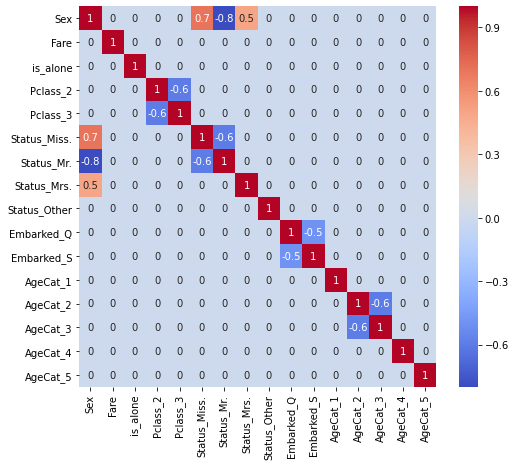

In [176]:
fig = plt.figure(figsize=(8, 7))
cm = np.round(X_train.corr(),1)
cm[np.abs(cm) < 0.5] = 0
sns.heatmap(cm, annot=True, cmap='coolwarm');

In [177]:
#удалим факторы с высокой коллинеарностью
X_train = X_train.drop(['Sex', 'Pclass_3', 'AgeCat_2', 'Status_Miss.', 'Embarked_S'], axis=1)
X_test = X_test.drop(['Sex', 'Pclass_3', 'AgeCat_2', 'Status_Miss.', 'Embarked_S'], axis=1)

In [178]:
X_train.shape, y_train.shape, X_test.shape

((889, 11), (889,), (418, 11))

### Логистическая регрессия

In [179]:
%%time
model = LogisticRegression(class_weight = 'balanced')
score = cross_val_score(model, X_train, y_train, scoring='f1', cv=5).mean()
print(f'Logistic Regression = {score:.2f}')

model.fit(X_train, y_train)
predicted = model.predict(X_test)
predicted.mean()

Logistic Regression = 0.72
CPU times: user 389 ms, sys: 100 ms, total: 489 ms
Wall time: 72 ms


0.42105263157894735

### Случайный лес

In [180]:
%%time
best_n = 1
best_depth = 1
best_score = 0
for n in range(1, 21):
    for d in range(1, 21):
        model = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=17)
        score = cross_val_score(model, X_train, y_train, scoring='f1', cv=5).mean()
        if score > best_score:
            best_score = score
            best_depth = d
            best_n = n  
print(f'Random Forest = {best_score:.2f}. n - {best_n}, d - {best_depth}')

model = RandomForestClassifier(n_estimators=best_n, max_depth=best_depth, random_state=17)
model.fit(X_train, y_train)
predicted = model.predict(X_test)
predicted.mean()

Random Forest = 0.74. n - 13, d - 14
CPU times: user 38.5 s, sys: 436 ms, total: 39 s
Wall time: 37.8 s


0.35406698564593303

### KNN

In [181]:
%%time
best_score = 0
best_neighbors = 0
for n in range(1,21):
    model = KNN(n_neighbors = n, weights='distance')
    score = cross_val_score(model, X_train, y_train, scoring='f1', cv=5).mean()
    if score > best_score:
        best_score = score
        best_n = n
print(f'KNN = {best_score:.2f}. n - {best_n}')

model = KNN(n_neighbors = best_n, weights='distance')
model.fit(X_train, y_train)
predicted = model.predict(X_test)
predicted.mean()

KNN = 0.71. n - 11
CPU times: user 623 ms, sys: 3.24 ms, total: 626 ms
Wall time: 625 ms


0.3660287081339713

**Вывод**   


Наилучший результат показала модель Случайного леса с гиперпараметрами n = 13 и глубиной d = 14.

### Оптимизация вероятностной границы

In [182]:
X_opt_train, X_opt_test, y_opt_train, y_opt_test = train_test_split(
    X_train, y_train, test_size=0.25, random_state=17)
model = RandomForestClassifier(n_estimators=best_n, max_depth=best_depth, random_state=17)

model.fit(X_opt_train, y_opt_train)
predictions = pd.DataFrame(model.predict_proba(X_opt_test))[1]

In [183]:
y_opt_test = y_opt_test.reset_index(drop=True)
tab = pd.concat([predictions, y_opt_test], axis=1)
tab.columns = ['proba_1', 'Survived']

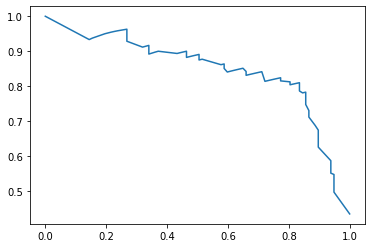

In [184]:
precision, recall, thresholds = precision_recall_curve(y_opt_test, predictions)
plt.plot(recall, precision);

In [185]:
score_max = 0
p_opt = 0
for p in np.arange(0.0, 1.0, 0.01):
    tab['Predicted'] = (tab['proba_1'] >= p)
    score = f1_score(tab['Survived'], tab['Predicted'])
    if score >= score_max:
        score_max = score
        p_opt = p
        
print(f'score - {score_max:.2f}, p - {p_opt}')

score - 0.82, p - 0.38


### CatBoost Classifier

In [211]:
cv_dataset = Pool(data=X_train, label=y_train)

params = {
    'loss_function': 'Logloss',
    'random_state': 7,
    'verbose': 0,
    'eval_metric' : 'TotalF1'
    }

scores = cv(cv_dataset, params, fold_count=3, logging_level='Silent', as_pandas=True)
score = scores['test-TotalF1-mean'].max()
print(f'score - {score:.2f}')

score - 0.83


**Вывод**   
Наилучший результат показала модель CatBoost

## Тест модели

In [188]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Fare          418 non-null    float64
 1   is_alone      418 non-null    int64  
 2   Pclass_2      418 non-null    uint8  
 3   Status_Mr.    418 non-null    uint8  
 4   Status_Mrs.   418 non-null    uint8  
 5   Status_Other  418 non-null    uint8  
 6   Embarked_Q    418 non-null    uint8  
 7   AgeCat_1      418 non-null    uint8  
 8   AgeCat_3      418 non-null    uint8  
 9   AgeCat_4      418 non-null    uint8  
 10  AgeCat_5      418 non-null    uint8  
dtypes: float64(1), int64(1), uint8(9)
memory usage: 13.5 KB


In [206]:
params = {
    'loss_function': 'Logloss',
    'random_state': 7,
    'verbose': 0,
    'eval_metric' : 'TotalF1'
    }
model = CatBoostClassifier(**params)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
prediction = pd.DataFrame(predictions, index=X_test.index, columns=['Survived'])
prediction['Survived'].value_counts()

0    271
1    147
Name: Survived, dtype: int64